In [1]:
import sys
sys.path.insert(0, '../src')

from zz_minimal_NN import *
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

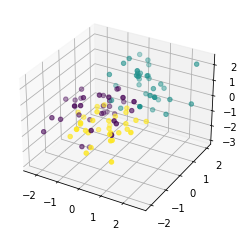

In [2]:
X, y = make_blobs(n_samples=100, n_features=4, centers=((1, 1,1,1), (5, 5,5,5), (3,-1,0,0)), cluster_std = 2)

X = StandardScaler().fit_transform(X)
ax = plt.subplot(projection='3d')
ax.scatter3D( X[:,0], X[:,1], X[:,2], c=y)

N = y.size
# one hot encoding
y_oh = np.zeros((N, 3))
y_oh[np.arange(N), y] = 1

In [3]:
X.shape, y.shape, y_oh.shape, type(X), type(y)

((100, 4), (100,), (100, 3), numpy.ndarray, numpy.ndarray)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y_oh, test_size=0.30)

In [5]:
y_train.shape, X_train.shape

((70, 3), (70, 4))

In [6]:
model = NN(learning_rate=0.001)

In [7]:
model.add(5, NN.ReLu)

In [8]:
model.add(3, NN.softmax)

In [9]:
model.model(X_train, y_train, verbose=True)

number of samples = 70
training data has 4 features
learning rate = 0.001

hidden layer 0:
nodes in previous layer: 4
nodes in this layer: 5
weight shape: (4, 5)
bias shape: (1, 5)
activation function is <function NN.ReLu at 0x113c40700>

hidden layer 1:
nodes in previous layer: 5
nodes in this layer: 3
weight shape: (5, 3)
bias shape: (1, 3)
activation function is <function NN.softmax at 0x113c40790>


In [10]:
model.fit(epochs=50)

shape of dZ is (70, 3); max dZ is 0.9867, min dZ is -0.9885
shape of dW is (5, 3); max dW is 0.3619, min dW is -0.3976
shape of W is (5, 3); max W is 1.5144, min W is -0.5754
shape of db is (1, 3); max db is 0.1374, min db is -0.1783
epoch 0. loss: 0.823, accuracy: 0.000
shape of dZ is (70, 3); max dZ is 0.9867, min dZ is -0.9884
shape of dW is (5, 3); max dW is 0.3617, min dW is -0.3974
shape of W is (5, 3); max W is 1.5144, min W is -0.5755
shape of db is (1, 3); max db is 0.1372, min db is -0.1782
epoch 1. loss: 0.823, accuracy: 0.000
shape of dZ is (70, 3); max dZ is 0.9866, min dZ is -0.9883
shape of dW is (5, 3); max dW is 0.3614, min dW is -0.3971
shape of W is (5, 3); max W is 1.5144, min W is -0.5755
shape of db is (1, 3); max db is 0.1371, min db is -0.1780
epoch 2. loss: 0.822, accuracy: 0.000
shape of dZ is (70, 3); max dZ is 0.9866, min dZ is -0.9883
shape of dW is (5, 3); max dW is 0.3612, min dW is -0.3969
shape of W is (5, 3); max W is 1.5145, min W is -0.5755
shape of 

In [11]:
model.predict()

array([1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 1])

In [12]:
model.accuracy(y_train)

0.6857142857142857